# Part 2: EDA and ML

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import pickle

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EDA

In [2]:
with open("countries_data_munged.pkl", 'rb') as picklefile: 
    countries = pickle.load(picklefile)

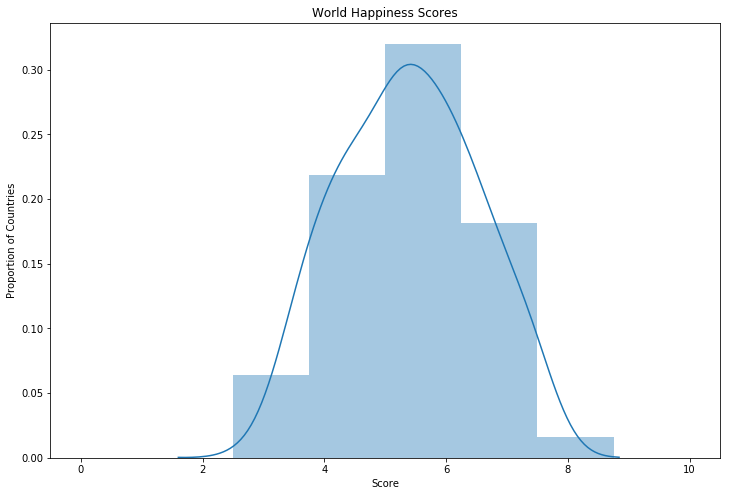

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
sns.distplot(countries.Score, hist = True, label = 'World Happiness Scores',hist_kws={"range": [0,10]})
ax.set_ylabel('Proportion of Countries')
ax.set_title('World Happiness Scores')
fig.savefig('CountryScoreDistribution');

In [4]:
countries.describe()

,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,Get_Median_Age,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
count,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,1.500000e+02,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,1.500000e+02,150.000000,150.000000,150.000000,1.500000e+02
mean,5.388247,1.199147,0.409927,0.247507,0.123207,4.877966e+07,8.270407e+05,11.999329,0.604615,30.388000,...,2.598243,3.089781,0.883374,0.184510,13.572519,1.633023e+11,21806.711409,0.112098,0.794074,7.169172e+05
std,1.117987,0.273863,0.151343,0.136247,0.103005,1.576175e+08,2.055728e+06,10.456041,0.223619,9.116243,...,1.321674,2.432751,0.150722,0.089493,2.924166,2.204976e+11,21955.570342,0.127288,0.316021,8.601183e+06
min,2.905000,0.396000,0.000000,0.000000,0.000000,3.397470e+05,1.000000e+00,2.300000,0.083000,15.400000,...,0.830000,0.100000,0.317000,0.021000,5.000000,1.056000e+09,800.000000,0.003000,0.010000,1.974981e+00
25%,4.519250,1.049250,0.307500,0.153500,0.057000,5.327853e+06,5.478225e+04,4.800000,0.433500,22.550000,...,1.657500,1.225000,0.826250,0.088250,12.000000,1.992750e+10,5550.000000,0.043000,0.675000,3.569117e+01
50%,5.302000,1.259000,0.438500,0.232000,0.089000,1.147905e+07,2.152165e+05,10.250000,0.607000,29.300000,...,2.080000,2.650000,0.953000,0.203500,13.572519,6.430000e+10,14800.000000,0.070000,0.990000,8.400662e+01
75%,6.152250,1.419000,0.519750,0.325750,0.152500,3.691537e+07,6.531885e+05,16.750000,0.789000,39.275000,...,3.010000,4.300000,0.997000,0.246750,15.000000,2.152250e+11,31425.000000,0.118750,1.000000,2.005088e+02
max,7.537000,1.611000,0.658000,0.838000,0.464000,1.379303e+09,1.637774e+07,83.400000,1.000000,47.300000,...,6.490000,13.700000,1.000000,0.379000,20.000000,9.261000e+11,124900.000000,0.950000,1.000000,1.053500e+08


In [5]:
countries.sort_values('Score', ascending = False).head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
95,Norway,7.537,1.534,0.635,0.362,0.316,5320045.0,304282.0,4.0,0.810,...,1.85,3.85,1.000,0.231,18.000000,3.759000e+11,70600.0,0.040,1.0,17.483929
33,Denmark,7.522,1.551,0.626,0.355,0.401,5605948.0,42434.0,3.4,0.880,...,1.73,3.50,1.000,0.197,19.000000,2.855000e+11,49600.0,0.058,1.0,132.109818
53,Iceland,7.504,1.611,0.627,0.476,0.154,339747.0,100250.0,4.8,0.943,...,2.00,3.18,1.000,0.219,20.000000,1.773000e+10,52100.0,0.028,1.0,3.388998
121,Switzerland,7.494,1.517,0.620,0.291,0.367,8236303.0,39997.0,3.7,0.741,...,1.56,5.00,1.000,0.195,16.000000,5.167000e+11,61400.0,0.030,1.0,205.923019
40,Finland,7.469,1.540,0.618,0.245,0.383,5518371.0,303815.0,3.1,0.845,...,1.75,4.53,1.000,0.222,19.000000,2.424000e+11,44000.0,0.087,1.0,18.163590
90,Netherlands,7.377,1.429,0.585,0.470,0.283,17084719.0,33893.0,3.6,0.915,...,1.78,4.70,1.000,0.204,18.000000,9.152000e+11,53600.0,0.051,1.0,504.078099
25,Canada,7.316,1.481,0.611,0.436,0.287,35623680.0,9093507.0,4.2,0.822,...,1.60,2.70,0.998,0.294,13.572519,1.764000e+09,48100.0,0.065,1.0,3.917485
91,New Zealand,7.314,1.548,0.614,0.500,0.383,4510327.0,264537.0,4.5,0.864,...,2.02,2.30,1.000,0.308,19.000000,1.857000e+11,38500.0,0.049,1.0,17.049891
6,Australia,7.284,1.510,0.602,0.478,0.301,23232413.0,7682300.0,4.4,0.897,...,1.77,3.90,1.000,0.290,20.000000,1.235000e+09,49900.0,0.056,1.0,3.024148
120,Sweden,7.284,1.478,0.613,0.385,0.384,9960487.0,410335.0,3.2,0.861,...,1.88,2.54,1.000,0.206,18.000000,5.217000e+11,51300.0,0.066,1.0,24.274037


In [6]:
countries.sort_values('Score').head(10)

,Country,Score,Social support,Freedom to make life choices,Generosity,Trust,Population,Land_Area,Support_Ratio,Urbanization,...,Fertility_Rate,Hospital_Bed_Density,Access_To_Clean_Water,Obesity_Rate,School_Life_Expectancy,GDP,GDP_per_capita,Unemployment_Rate,Electrification_Rate,Population Density
22,Burundi,2.905,0.630,0.060,0.204,0.084,11466756.0,25680.000000,21.1,0.127,...,5.99,1.900000,0.759,0.054,11.000000,7.985000e+09,800.0,0.112098,0.05,446.524766
125,Tanzania,3.349,1.042,0.390,0.354,0.066,53950935.0,885800.000000,16.6,0.330,...,4.77,0.700000,0.556,0.084,8.000000,1.628000e+11,3300.0,0.103000,0.24,60.906452
122,Syria,3.462,0.396,0.082,0.494,0.151,18028549.0,183630.000000,14.3,0.585,...,2.50,1.500000,0.901,0.278,9.000000,5.028000e+10,2900.0,0.500000,0.96,98.178669
106,Rwanda,3.471,0.946,0.582,0.253,0.455,11901484.0,24668.000000,20.1,0.307,...,3.87,1.600000,0.761,0.058,11.000000,2.461000e+10,2100.0,0.027000,0.21,482.466515
127,Togo,3.495,0.432,0.380,0.197,0.096,7965055.0,54385.000000,19.8,0.410,...,4.38,0.700000,0.631,0.084,12.000000,1.243000e+10,1600.0,0.069000,0.27,146.456836
48,Guinea,3.507,0.791,0.349,0.265,0.111,12413867.0,245717.000000,17.8,0.382,...,4.77,0.300000,0.768,0.077,9.000000,2.645000e+10,2000.0,0.028000,0.26,50.520994
71,Liberia,3.533,0.872,0.333,0.267,0.039,4689021.0,96320.000000,18.1,0.505,...,5.06,0.800000,0.756,0.099,13.572519,3.906000e+09,900.0,0.028000,0.10,48.681696
116,South Sudan,3.591,0.601,0.147,0.286,0.117,13026129.0,827040.656757,15.7,0.193,...,5.07,3.089781,0.587,0.066,13.572519,1.975000e+10,1500.0,0.112098,0.01,716917.184175
141,Yemen,3.593,0.935,0.249,0.104,0.057,28036829.0,527968.000000,19.8,0.358,...,3.63,0.700000,0.549,0.171,9.000000,6.895000e+10,2300.0,0.270000,0.48,53.103273
49,Haiti,3.603,0.640,0.030,0.489,0.100,10646714.0,27560.000000,13.3,0.609,...,2.72,1.300000,0.577,0.227,13.572519,1.988000e+10,1800.0,0.406000,0.38,386.310377


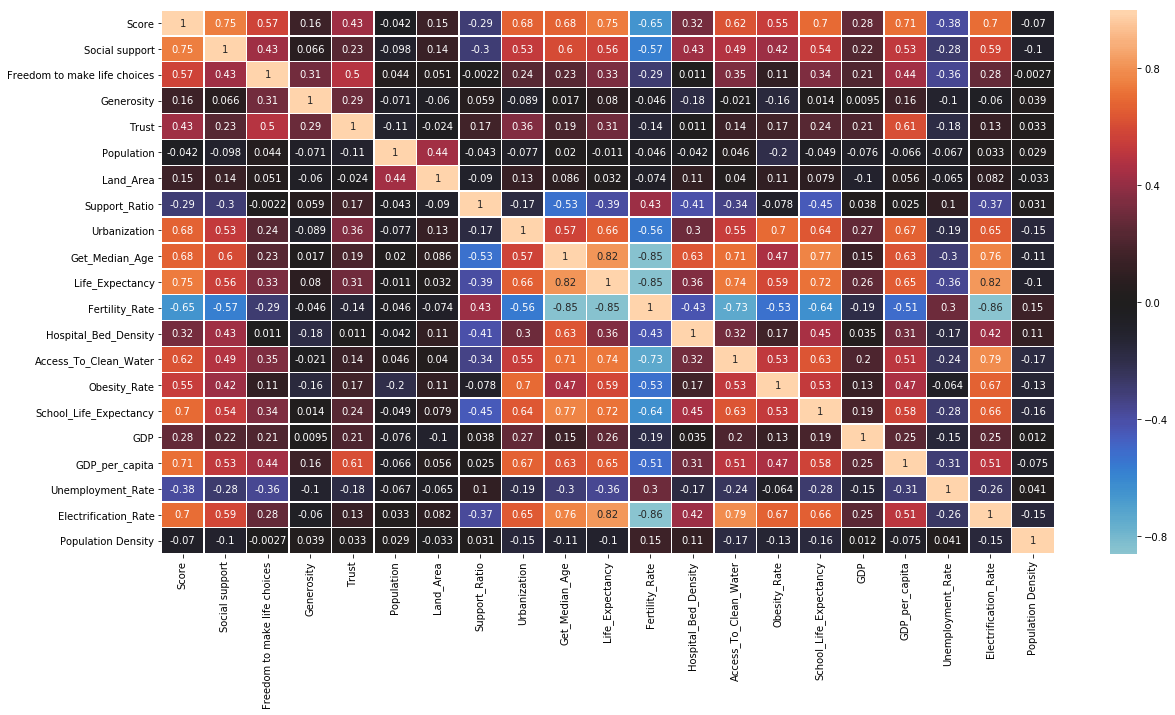

In [7]:
plt.figure(figsize = (20,10))

ax = sns.heatmap(countries.corr(), annot=True, linewidths=.5, center = 0)

In [8]:
countries.corr().sort_values('Score', ascending = False).Score

Score                           1.000000
Social support                  0.749257
Life_Expectancy                 0.745372
GDP_per_capita                  0.713507
Electrification_Rate            0.703249
School_Life_Expectancy          0.698962
Get_Median_Age                  0.679875
Urbanization                    0.677217
Access_To_Clean_Water           0.624816
Freedom to make life choices    0.572776
Obesity_Rate                    0.549413
Trust                           0.432747
Hospital_Bed_Density            0.324390
GDP                             0.278664
Generosity                      0.157282
Land_Area                       0.151646
Population                     -0.042003
Population Density             -0.070205
Support_Ratio                  -0.292956
Unemployment_Rate              -0.381854
Fertility_Rate                 -0.653119
Name: Score, dtype: float64

In [9]:
countries = countries.drop(['Population Density', 'GDP','Land_Area','Population','Generosity'], axis = 1)

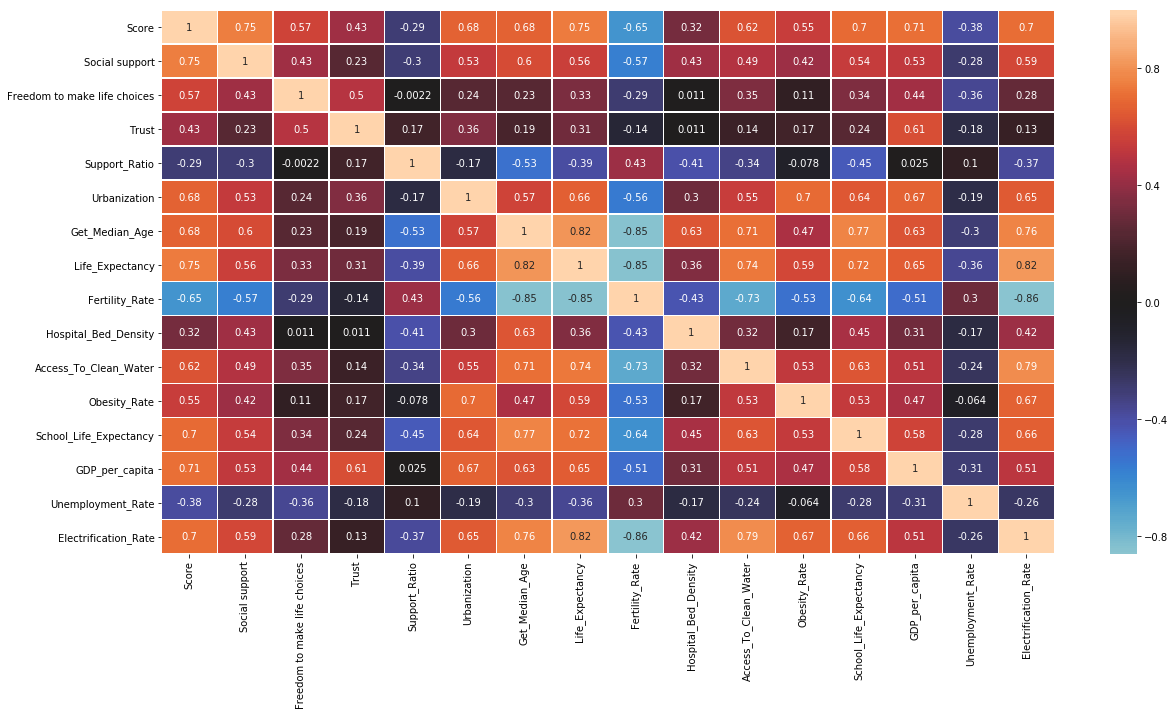

In [10]:
plt.figure(figsize = (20,10))

ax = sns.heatmap(countries.corr(), annot=True, linewidths=.5, center = 0)

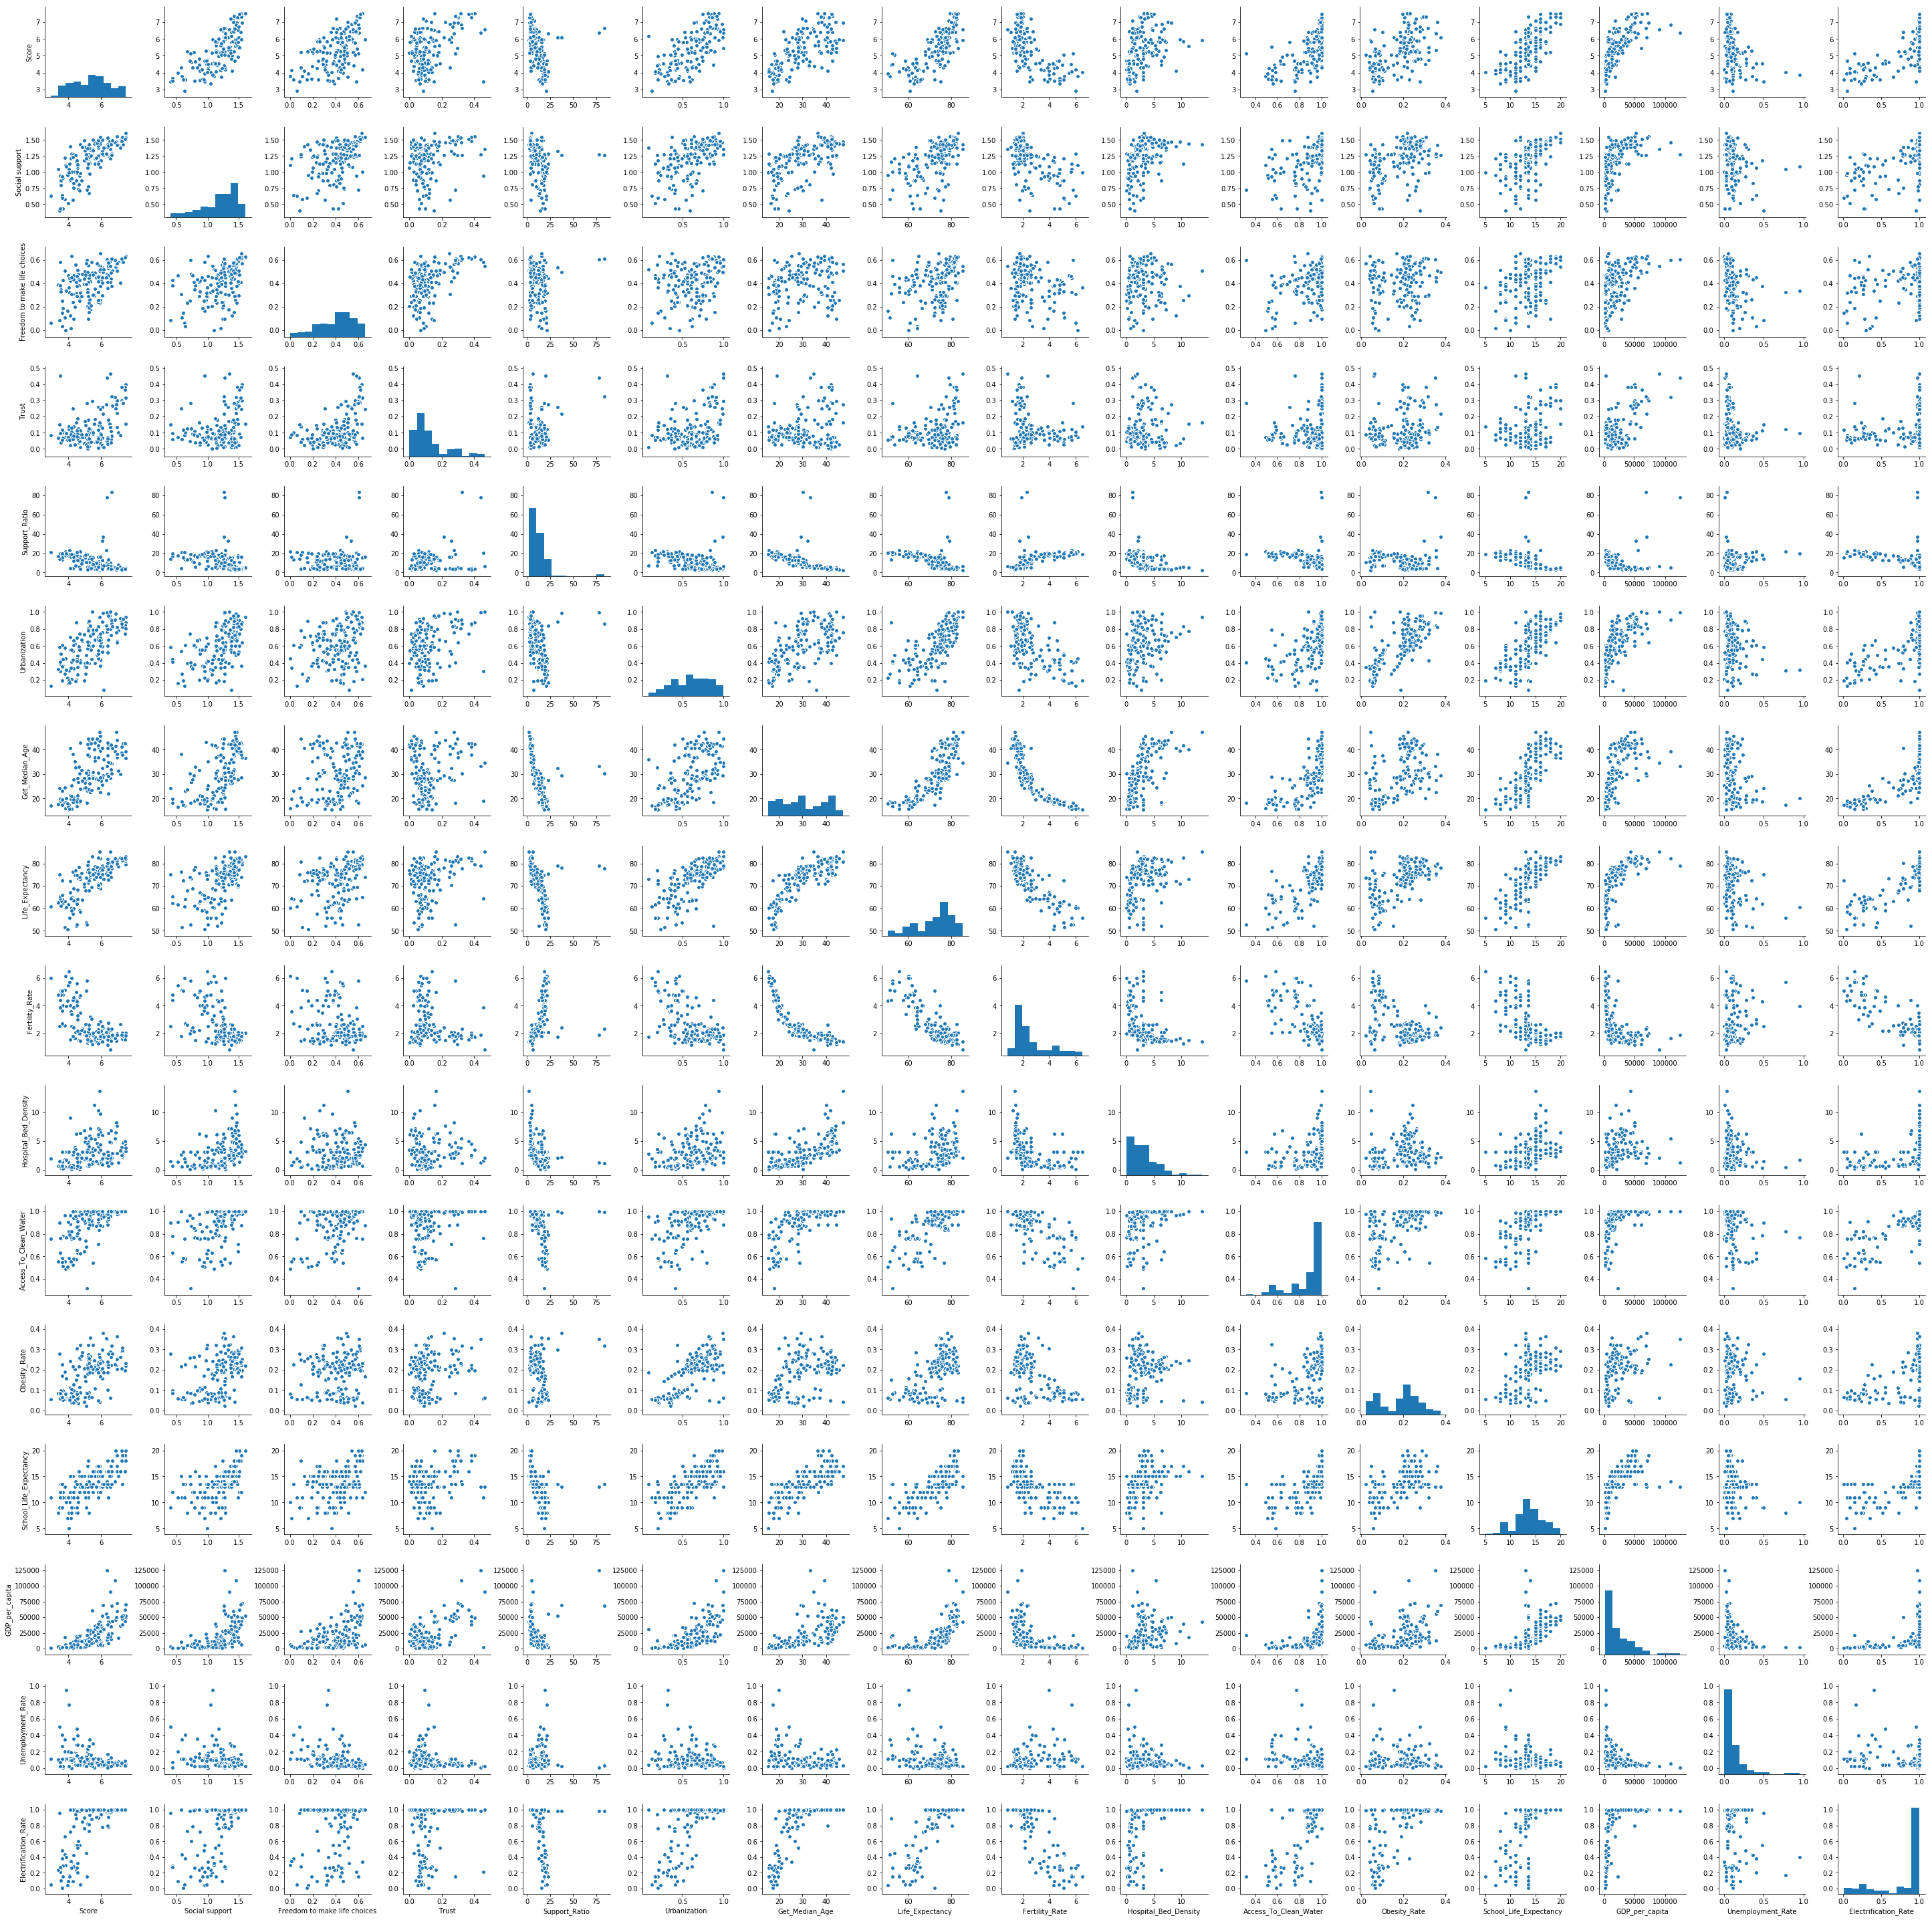

In [11]:
sns.pairplot(countries)

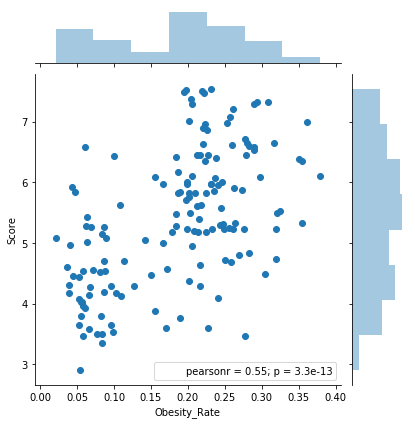

In [12]:
sns.jointplot(countries.Obesity_Rate, countries.Score)

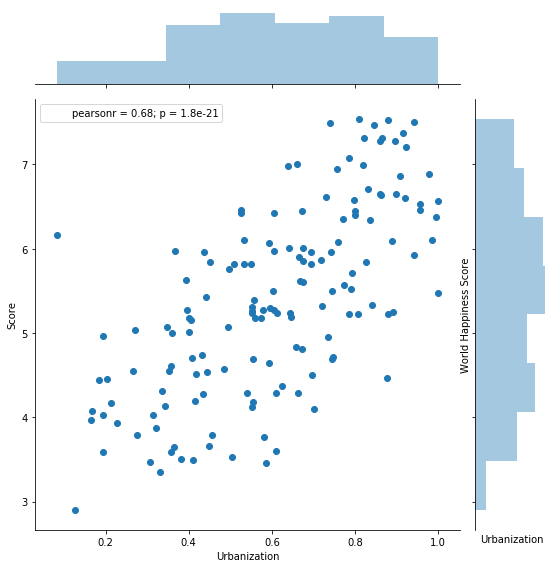

In [13]:
sns.jointplot(x='Urbanization', y='Score', data = countries, size = 8)
plt.xlabel('Urbanization')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

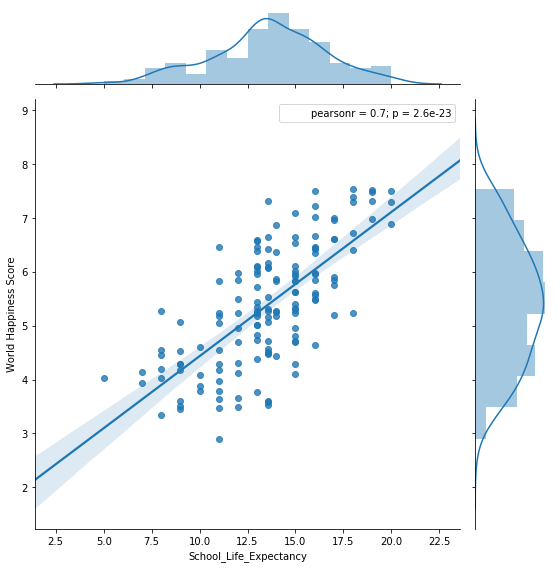

In [14]:
sns.jointplot(x='School_Life_Expectancy', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('School_Life_Expectancy')
plt.ylabel("World Happiness Score");
#plt.title('World Happiness Score vs. Urbanization')

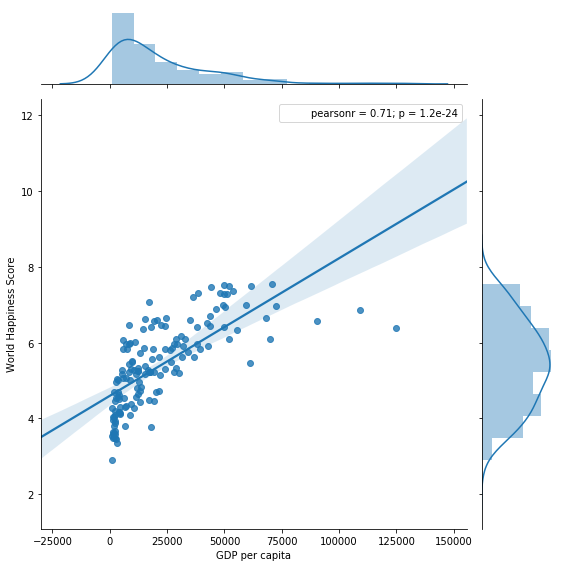

In [71]:
sns.jointplot(x='GDP_per_capita', y='Score', data = countries, kind = 'reg', size = 8)
plt.xlabel('GDP per capita')
plt.ylabel("World Happiness Score");
plt.savefig('GDPpercapita')
#plt.title('World Happiness Score vs. Urbanization')

## Regression

In [16]:
countries['intercept']=1

In [17]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     43.04
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           9.68e-44
Time:                        15:13:27   Log-Likelihood:                -96.995
No. Observations:                 150   AIC:                             226.0
Df Residuals:                     134   BIC:                             274.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2207      0.216      5.655      0.000       0.794       1.648
Freedom to make life choices     1.5438      0.388      3.979      0.000       0.776       2.311
Trust                            0.4344      0.572      0.759      0.449      -0.698       1.566
Support_Ratio                   -0.0119      0.006     -2.085      0.039      -0.023      -0.001
Urbanization                     0.3588      0.322      1.113      0.268      -0.279       0.996
Get_Median_Age                   0.0050      0.014      0.352      0.725      -0.023       0.033
Life_Expectancy                  0.0166      0.013      1.323      0.188      -0.008       0.041
Fertility_Rate                   0.1001      0.083      1.209      0.229      -0.064       0.264
Hospital_Bed_Density            -0.0376      0.024     -1.539      0.126      -0.086       0.011
Access_To_Clean_Water           -0.3782      0.486     -0.778      0.438      -1.340       0.583
Obesity_Rate                     0.8745      0.760      1.150      0.252      -0.629       2.378
School_Life_Expectancy           0.0325      0.026      1.273      0.205      -0.018       0.083
GDP_per_capita                1.026e-05   3.96e-06      2.588      0.011    2.42e-06    1.81e-05
Unemployment_Rate               -0.4717      0.360     -1.310      0.193      -1.184       0.241
Electrification_Rate             0.7080      0.338      2.096      0.038       0.040       1.376
intercept                        0.6643      1.069      0.622      0.535      -1.449       2.778
==============================================================================
Omnibus:                        3.987   Durbin-Watson:                   2.259
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                3.520
Skew:                          -0.300   Prob(JB):                        0.172
Kurtosis:                       3.450   Cond. No.                     8.41e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21339611604515937

In [19]:
countries = countries.drop(['Trust', 'Get_Median_Age'], axis = 1)

In [20]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     50.09
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           2.70e-45
Time:                        15:13:27   Log-Likelihood:                -97.379
No. Observations:                 150   AIC:                             222.8
Df Residuals:                     136   BIC:                             264.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2098      0.213      5.678      0.000       0.788       1.631
Freedom to make life choices     1.6188      0.346      4.681      0.000       0.935       2.303
Support_Ratio                   -0.0124      0.005     -2.292      0.023      -0.023      -0.002
Urbanization                     0.3646      0.315      1.159      0.249      -0.258       0.987
Life_Expectancy                  0.0186      0.012      1.517      0.132      -0.006       0.043
Fertility_Rate                   0.0899      0.070      1.281      0.202      -0.049       0.229
Hospital_Bed_Density            -0.0340      0.022     -1.575      0.118      -0.077       0.009
Access_To_Clean_Water           -0.4025      0.468     -0.861      0.391      -1.327       0.522
Obesity_Rate                     0.8464      0.755      1.121      0.264      -0.647       2.340
School_Life_Expectancy           0.0344      0.024      1.440      0.152      -0.013       0.082
GDP_per_capita                1.197e-05   3.27e-06      3.654      0.000    5.49e-06    1.84e-05
Unemployment_Rate               -0.4477      0.357     -1.253      0.212      -1.154       0.259
Electrification_Rate             0.6797      0.333      2.040      0.043       0.021       1.339
intercept                        0.7125      1.029      0.693      0.490      -1.322       2.747
==============================================================================
Omnibus:                        3.743   Durbin-Watson:                   2.244
Prob(Omnibus):                  0.154   Jarque-Bera (JB):                3.263
Skew:                          -0.290   Prob(JB):                        0.196
Kurtosis:                       3.431   Cond. No.                     8.18e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.18e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21449145020405894

In [22]:
countries = countries.drop(['Access_To_Clean_Water'], axis = 1)

In [23]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     54.31
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           5.14e-46
Time:                        15:13:27   Log-Likelihood:                -97.787
No. Observations:                 150   AIC:                             221.6
Df Residuals:                     137   BIC:                             260.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2257      0.212      5.780      0.000       0.806       1.645
Freedom to make life choices     1.5764      0.342      4.609      0.000       0.900       2.253
Support_Ratio                   -0.0121      0.005     -2.235      0.027      -0.023      -0.001
Urbanization                     0.3757      0.314      1.196      0.234      -0.245       0.997
Life_Expectancy                  0.0180      0.012      1.471      0.144      -0.006       0.042
Fertility_Rate                   0.0934      0.070      1.334      0.184      -0.045       0.232
Hospital_Bed_Density            -0.0327      0.022     -1.519      0.131      -0.075       0.010
Obesity_Rate                     0.8599      0.754      1.140      0.256      -0.631       2.351
School_Life_Expectancy           0.0319      0.024      1.349      0.180      -0.015       0.079
GDP_per_capita                1.167e-05   3.25e-06      3.586      0.000    5.23e-06    1.81e-05
Unemployment_Rate               -0.4631      0.356     -1.299      0.196      -1.168       0.242
Electrification_Rate             0.5667      0.306      1.852      0.066      -0.038       1.172
intercept                        0.5045      0.999      0.505      0.614      -1.471       2.480
==============================================================================
Omnibus:                        3.544   Durbin-Watson:                   2.245
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.039
Skew:                          -0.293   Prob(JB):                        0.219
Kurtosis:                       3.379   Cond. No.                     7.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21565978077288833

In [25]:
countries = countries.drop(['Obesity_Rate'], axis = 1)

In [26]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     59.00
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           1.23e-46
Time:                        15:13:27   Log-Likelihood:                -98.495
No. Observations:                 150   AIC:                             221.0
Df Residuals:                     138   BIC:                             257.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2478      0.211      5.902      0.000       0.830       1.666
Freedom to make life choices     1.4921      0.334      4.464      0.000       0.831       2.153
Support_Ratio                   -0.0106      0.005     -2.014      0.046      -0.021      -0.000
Urbanization                     0.5065      0.293      1.731      0.086      -0.072       1.085
Life_Expectancy                  0.0187      0.012      1.532      0.128      -0.005       0.043
Fertility_Rate                   0.0998      0.070      1.428      0.156      -0.038       0.238
Hospital_Bed_Density            -0.0375      0.021     -1.773      0.078      -0.079       0.004
School_Life_Expectancy           0.0369      0.023      1.587      0.115      -0.009       0.083
GDP_per_capita                1.146e-05   3.25e-06      3.525      0.001    5.03e-06    1.79e-05
Unemployment_Rate               -0.4070      0.353     -1.152      0.252      -1.106       0.292
Electrification_Rate             0.6951      0.285      2.441      0.016       0.132       1.258
intercept                        0.3471      0.991      0.350      0.727      -1.612       2.306
==============================================================================
Omnibus:                        3.142   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.637
Skew:                          -0.281   Prob(JB):                        0.268
Kurtosis:                       3.326   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21770623589154117

In [28]:
countries = countries.drop(['Unemployment_Rate'], axis = 1)

In [29]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     64.62
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           2.85e-47
Time:                        15:13:27   Log-Likelihood:                -99.212
No. Observations:                 150   AIC:                             220.4
Df Residuals:                     139   BIC:                             253.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2555      0.212      5.934      0.000       0.837       1.674
Freedom to make life choices     1.5831      0.325      4.868      0.000       0.940       2.226
Support_Ratio                   -0.0103      0.005     -1.968      0.051      -0.021    4.58e-05
Urbanization                     0.4825      0.292      1.651      0.101      -0.095       1.060
Life_Expectancy                  0.0214      0.012      1.782      0.077      -0.002       0.045
Fertility_Rate                   0.1003      0.070      1.434      0.154      -0.038       0.239
Hospital_Bed_Density            -0.0350      0.021     -1.661      0.099      -0.077       0.007
School_Life_Expectancy           0.0370      0.023      1.589      0.114      -0.009       0.083
GDP_per_capita                1.146e-05   3.26e-06      3.520      0.001    5.02e-06    1.79e-05
Electrification_Rate             0.6715      0.284      2.362      0.020       0.109       1.234
intercept                        0.0808      0.964      0.084      0.933      -1.826       1.988
==============================================================================
Omnibus:                        2.638   Durbin-Watson:                   2.227
Prob(Omnibus):                  0.267   Jarque-Bera (JB):                2.165
Skew:                          -0.222   Prob(JB):                        0.339
Kurtosis:                       3.387   Cond. No.                     7.52e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.21979811766067731

In [31]:
countries = countries.drop(['Fertility_Rate'], axis = 1)

In [32]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     71.03
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           9.00e-48
Time:                        15:13:28   Log-Likelihood:                -100.31
No. Observations:                 150   AIC:                             220.6
Df Residuals:                     140   BIC:                             250.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2271      0.211      5.804      0.000       0.809       1.645
Freedom to make life choices     1.5741      0.326      4.823      0.000       0.929       2.219
Support_Ratio                   -0.0097      0.005     -1.840      0.068      -0.020       0.001
Urbanization                     0.5415      0.290      1.864      0.064      -0.033       1.116
Life_Expectancy                  0.0138      0.011      1.275      0.205      -0.008       0.035
Hospital_Bed_Density            -0.0382      0.021     -1.818      0.071      -0.080       0.003
School_Life_Expectancy           0.0386      0.023      1.652      0.101      -0.008       0.085
GDP_per_capita                1.152e-05   3.27e-06      3.526      0.001    5.06e-06     1.8e-05
Electrification_Rate             0.4688      0.248      1.893      0.060      -0.021       0.958
intercept                        1.0342      0.701      1.475      0.143      -0.352       2.421
==============================================================================
Omnibus:                        3.693   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                3.246
Skew:                          -0.275   Prob(JB):                        0.197
Kurtosis:                       3.465   Cond. No.                     5.57e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.22305186928663062

In [34]:
countries = countries.drop(['Life_Expectancy'], axis = 1)

In [64]:
model = sm.OLS(countries.Score,countries.iloc[:,2:])

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     79.35
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           2.17e-48
Time:                        15:14:44   Log-Likelihood:                -101.18
No. Observations:                 150   AIC:                             220.4
Df Residuals:                     141   BIC:                             247.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.2110      0.212      5.725      0.000       0.793       1.629
Freedom to make life choices     1.5706      0.327      4.802      0.000       0.924       2.217
Support_Ratio                   -0.0117      0.005     -2.332      0.021      -0.022      -0.002
Urbanization                     0.5492      0.291      1.887      0.061      -0.026       1.125
Hospital_Bed_Density            -0.0431      0.021     -2.084      0.039      -0.084      -0.002
School_Life_Expectancy           0.0438      0.023      1.898      0.060      -0.002       0.089
GDP_per_capita                1.331e-05   2.96e-06      4.499      0.000    7.46e-06    1.92e-05
Electrification_Rate             0.6628      0.196      3.386      0.001       0.276       1.050
intercept                        1.8232      0.331      5.514      0.000       1.170       2.477
==============================================================================
Omnibus:                        4.430   Durbin-Watson:                   2.223
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                4.101
Skew:                          -0.295   Prob(JB):                        0.129
Kurtosis:                       3.554   Cond. No.                     2.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
mean_squared_error(countries.Score,fit.predict(countries.iloc[:,2:]))

0.22564090194466474

## Resulting Model

In [69]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:], countries.Score, test_size=0.3)

In [70]:
model = sm.OLS(y_train,X_train)

fit=model.fit()

fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     44.07
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           7.48e-29
Time:                        15:16:14   Log-Likelihood:                -77.734
No. Observations:                 105   AIC:                             173.5
Df Residuals:                      96   BIC:                             197.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.0132      0.276      3.677      0.000       0.466       1.560
Freedom to make life choices     1.5539      0.450      3.450      0.001       0.660       2.448
Support_Ratio                   -0.0234      0.012     -2.010      0.047      -0.046      -0.000
Urbanization                     0.5087      0.366      1.389      0.168      -0.218       1.236
Hospital_Bed_Density            -0.0636      0.026     -2.465      0.015      -0.115      -0.012
School_Life_Expectancy           0.0267      0.032      0.844      0.401      -0.036       0.090
GDP_per_capita                1.591e-05   4.21e-06      3.780      0.000    7.56e-06    2.43e-05
Electrification_Rate             0.7228      0.283      2.553      0.012       0.161       1.285
intercept                        2.4204      0.495      4.886      0.000       1.437       3.404
==============================================================================
Omnibus:                        5.167   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                4.575
Skew:                          -0.486   Prob(JB):                        0.102
Kurtosis:                       3.316   Cond. No.                     2.70e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
mean_squared_error(y_test,fit.predict(X_test))

0.17706862844334767

In [40]:
mean_squared_error(y_train,fit.predict(X_train))

0.24904670112112726

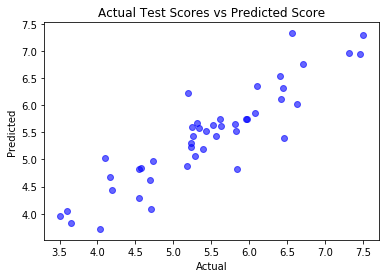

In [41]:
plt.scatter(y_test,fit.predict(X_test), color = 'b', alpha = 0.6)
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Actual Test Scores vs Predicted Score');
plt.savefig('ActualvPredicted')

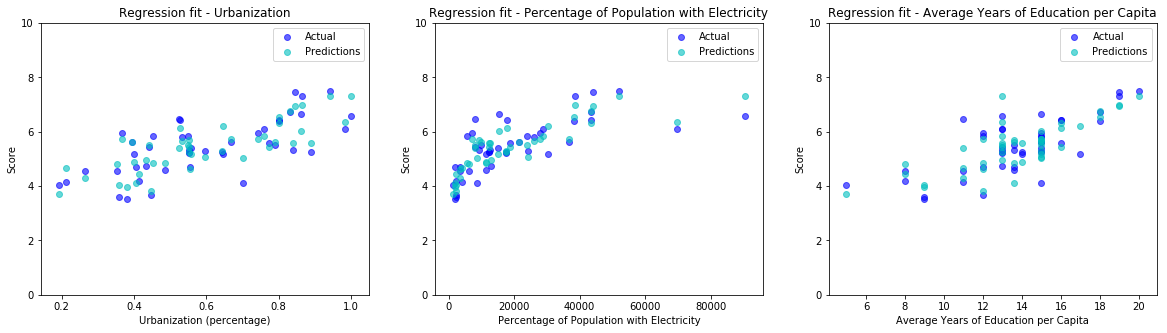

In [42]:
pred = fit.predict(X_test)
residual = fit.predict(X_test) - y_test

plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.scatter(X_test['Urbanization'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['Urbanization'], pred, color='c',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Regression fit - Urbanization")
plt.xlabel("Urbanization (percentage)")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(1, 3, 2)
plt.scatter(X_test['GDP_per_capita'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['GDP_per_capita'], pred, color='c',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Regression fit - Percentage of Population with Electricity")
plt.xlabel("Percentage of Population with Electricity")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.subplot(1, 3, 3)
plt.scatter(X_test['School_Life_Expectancy'],y_test, color = 'b', label = 'Actual', alpha = 0.6)
plt.scatter(X_test['School_Life_Expectancy'], pred, color='c',linewidth=1, label = 'Predictions', alpha = 0.6)
plt.title("Regression fit - Average Years of Education per Capita")
plt.xlabel("Average Years of Education per Capita")
plt.ylabel("Score")
plt.legend()
plt.ylim(0,10)

plt.savefig('RegressionFit')

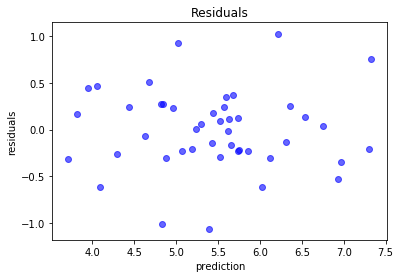

In [43]:
residual = pred - y_test
plt.scatter(pred, residual, color = 'b', alpha = 0.6)
plt.title("Residuals")
plt.xlabel("prediction")
plt.ylabel("residuals")
plt.savefig('ResidualsvPrediction')

In [44]:
lr = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(countries.iloc[:,2:-1], countries.Score, test_size=0.3)

lr.fit(X_train, y_train)

lr.score(X_test, y_test)


0.7313381112256544

In [45]:
# 10-fold cross-validation
reg = LinearRegression()
r2_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error')

print('r2',r2_scores)
print('mse',-mse_scores)

r2 [ 0.72620466  0.91386306  0.88044817  0.72292337  0.5565368   0.55808894
  0.62417517  0.89756802  0.8307688   0.80816711]
mse [ 0.22858083  0.12816719  0.12112336  0.33128012  0.37102068  0.4586806
  0.45380844  0.17418105  0.19544505  0.23234905]


/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

In [46]:
cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
cross_val_score(reg, X_train, y_train, cv=10, scoring='mean_squared_error').mean()

/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/emilygeller/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sampl

-0.26946363758770314

In [47]:
encv = ElasticNetCV(cv = 10, alphas = [1e-5,1e-3,1,1e3,1e5])
encv.fit(X_train, y_train)
encv.score(X_test, y_test)


0.73133960386073626

In [48]:
mean_squared_error(y_test,encv.predict(X_test))

0.28743001626977005

In [49]:
encv.alpha_

1.0000000000000001e-05

- Predicted vs Actual Plots
- Predict vs Feature Plots
- Residual Plots
- Coefficients

In [50]:
encv.coef_

array([  1.17526926e+00,   1.63813231e+00,  -7.98877501e-03,
         6.88886300e-01,  -4.67186358e-02,   4.89696057e-02,
         1.48769421e-05,   5.28458430e-01])

In [51]:
rcv = RidgeCV(cv = 10)
rcv.fit(X_train, y_train)
rcv.score(X_test, y_test)

0.73141073163555725

In [52]:
mean_squared_error(y_test,rcv.predict(X_test))

0.28735391924256465

In [53]:
rcv.alpha_

0.1

In [54]:
rcv.coef_

array([  1.17110416e+00,   1.55391153e+00,  -7.98300247e-03,
         6.40444790e-01,  -4.77943056e-02,   5.08210140e-02,
         1.53873377e-05,   5.36919158e-01])

In [55]:
lcv = LassoCV(cv = 10)
lcv.fit(X_train, y_train)
lcv.score(X_test, y_test)

0.23899316949478666

In [56]:
mean_squared_error(y_test,lcv.predict(X_test))

0.81417361403775668

In [57]:
lcv.alpha_

1073.1455626625652

In [58]:
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients":np.transpose(rcv.coef_)})

In [59]:
coefficients = coefficients.sort_values('Coefficients',ascending = False).reset_index(drop = True)
coefficients

,Coefficients,Feature
0,1.553912,Freedom to make life choices
1,1.171104,Social support
2,0.640445,Urbanization
3,0.536919,Electrification_Rate
4,0.050821,School_Life_Expectancy
5,0.000015,GDP_per_capita
6,-0.007983,Support_Ratio
7,-0.047794,Hospital_Bed_Density


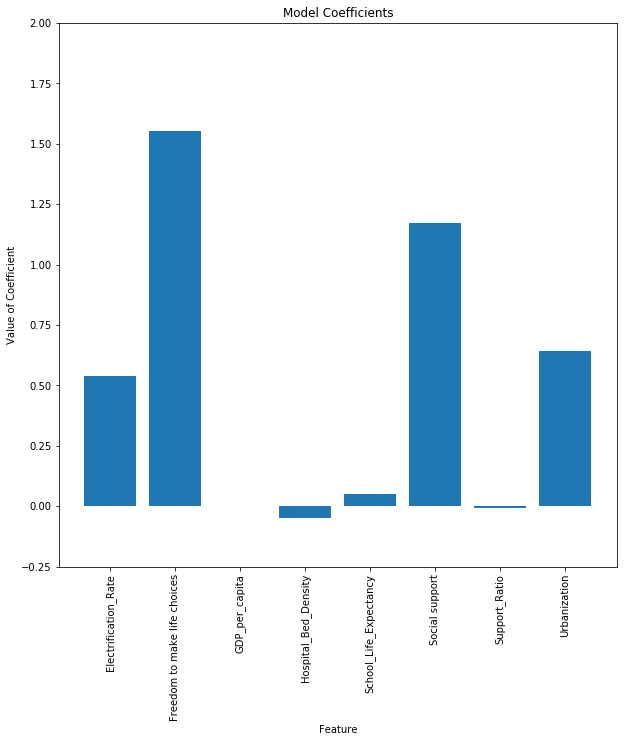

In [60]:
f, ax = plt.subplots(1,1,figsize=(10,10))
plt.bar(coefficients['Feature'],coefficients['Coefficients'])
plt.ylim(-0.25,2)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.title('Model Coefficients')
plt.xlabel('Feature')
plt.ylabel('Value of Coefficient');
plt.savefig('coefficients')

In [61]:

# Create your model
model = sm.OLS(y_train,X_train)
# Fit your model to your training set
fit=model.fit()
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1438.
Date:                Thu, 01 Feb 2018   Prob (F-statistic):           3.56e-97
Time:                        15:13:29   Log-Likelihood:                -76.820
No. Observations:                 105   AIC:                             169.6
Df Residuals:                      97   BIC:                             190.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Social support                   1.6551      0.231      7.151      0.000       1.196       2.115
Freedom to make life choices     1.7681      0.397      4.453      0.000       0.980       2.556
Support_Ratio                    0.0091      0.005      1.690      0.094      -0.002       0.020
Urbanization                     0.8309      0.421      1.973      0.051      -0.005       1.667
Hospital_Bed_Density            -0.0309      0.028     -1.118      0.266      -0.086       0.024
School_Life_Expectancy           0.1313      0.022      5.943      0.000       0.087       0.175
GDP_per_capita                3.952e-06   3.72e-06      1.064      0.290   -3.42e-06    1.13e-05
Electrification_Rate             0.4027      0.258      1.558      0.122      -0.110       0.916
==============================================================================
Omnibus:                        6.569   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                8.354
Skew:                           0.298   Prob(JB):                       0.0153
Kurtosis:                       4.246   Cond. No.                     2.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""